In [1]:
import numpy as np 
import gvar as gv
import h5py as h5

from lametlat.utils.plot_settings import *
from lametlat.utils.resampling import *
from lametlat.preprocess.read_raw import pt2_to_meff

In [5]:
data_path = "output/S8T32_proton_PDF.h5"

tsep = 8
z = 1

# read data
f = h5.File(data_path, 'r')

# read 2pt data
pt2_real = (f['2pt']['px0_py0_pz0_pt0']['gamma_I']['real'][:] + f['2pt']['px0_py0_pz0_pt0']['gamma_T']['real'][:])/4
pt2_imag = (f['2pt']['px0_py0_pz0_pt0']['gamma_I']['imag'][:] + f['2pt']['px0_py0_pz0_pt0']['gamma_T']['imag'][:])/4

pt2_real_jk = jackknife(pt2_real)
pt2_imag_jk = jackknife(pt2_imag)

pt2_real_jk_avg = jk_ls_avg(pt2_real_jk)
pt2_imag_jk_avg = jk_ls_avg(pt2_imag_jk)

# read 3pt data
pt3_real = f['3pt']['px0_py0_pz0_pt0'][f'tsep_{tsep}'][f'z_{z}']['down']['PpSzp']['gamma_T']['real']
pt3_imag = f['3pt']['px0_py0_pz0_pt0'][f'tsep_{tsep}'][f'z_{z}']['down']['PpSzp']['gamma_T']['imag']

pt3_real_jk = jackknife(pt3_real)
pt3_imag_jk = jackknife(pt3_imag)

pt3_real_jk_avg = jk_ls_avg(pt3_real_jk)
pt3_imag_jk_avg = jk_ls_avg(pt3_imag_jk)

print(np.shape(pt2_real_jk_avg))
print(np.shape(pt3_real_jk_avg))


(32,)
(32,)


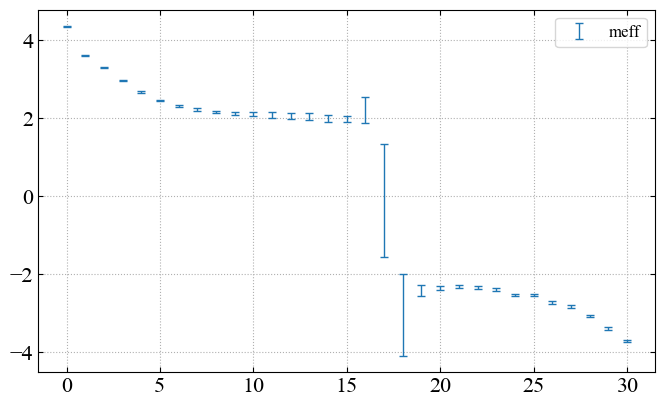

In [3]:
meff = pt2_to_meff(pt2_real_jk_avg, boundary="none")

fig, ax = default_plot()
ax.errorbar(np.arange(len(meff)), gv.mean(meff), gv.sdev(meff), label='meff', **errorb)
ax.legend(loc="upper right", ncol=2, **fs_small_p)
plt.tight_layout()
plt.show()

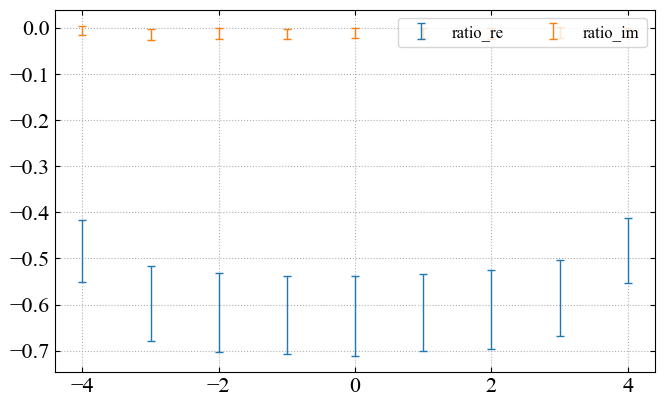

In [6]:
tau_cut = 0

ratio_re = pt3_real_jk_avg[tau_cut:tsep+1-tau_cut] / pt2_real_jk_avg[tsep]
ratio_im = pt3_imag_jk_avg[tau_cut:tsep+1-tau_cut] / pt2_real_jk_avg[tsep]

tau_ls = np.arange(tau_cut, tsep+1-tau_cut) - tsep/2

fig, ax = default_plot()
ax.errorbar(tau_ls, gv.mean(ratio_re), gv.sdev(ratio_re), label='ratio_re', **errorb)
ax.errorbar(tau_ls, gv.mean(ratio_im), gv.sdev(ratio_im), label='ratio_im', **errorb)
ax.legend(loc="upper right", ncol=2, **fs_small_p)
plt.tight_layout()
plt.show()
